<h1 align=center><span style="color:blue">Segmenting and Clustering Neighborhoods in Novi</span></h1>

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from bs4 import BeautifulSoup

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# Seaborn
import seaborn as sns
sns.set()

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

## <span style="color:blue">Part 1 : Scrape Open Data of Novi</span>

## Population:

#### To get html population data: https://api.opendatanetwork.com/data/v1/values?app_token=cQovpGcdUT1CSzgYk0KPYdAI0&describe=true&forecast=5&format=google&variable=demographics.population.count&entity_id=1600000US2659440

In [2]:
population_html = requests.get('https://api.opendatanetwork.com/data/v1/values?app_token=cQovpGcdUT1CSzgYk0KPYdAI0&describe=true&forecast=5&format=google&variable=demographics.population.count&entity_id=1600000US2659440').text
soup_population = BeautifulSoup(population_html,'lxml')

str_pop = soup_population.p.text
#str_pop

**Create a function to convert json into list**

In [13]:
def json2list(str_data):
    dict_data = json.loads(str_data)
    data_rows = dict_data['data']['rows']
    
    v0 = []
    v1 = []
    
    for i in range(len(data_rows)):
        data_row = data_rows[i]['c']
        v0.append(data_row[0]['v'])
        v1.append(data_row[1]['v'])
    
    return v0, v1

**Create "Year" and "Population" list**

In [16]:
year, population = json2list(str_pop)

year = year[0:10]
population = population[0:10]

df_pop = pd.DataFrame(year,columns=['Year'])
df_pop['Population'] = population

df_pop

,Year,Population
0,2009,53705.00
1,2010,53823.00
2,2011,54446.00
3,2012,55319.00
4,2013,56131.00
5,2014,56887.00
6,2015,57577.00
7,2016,58233.00
8,2017,58835.00
9,2018,59476.25


Text(0.5, 1.0, 'Population in Novi, MI 2009-2018')

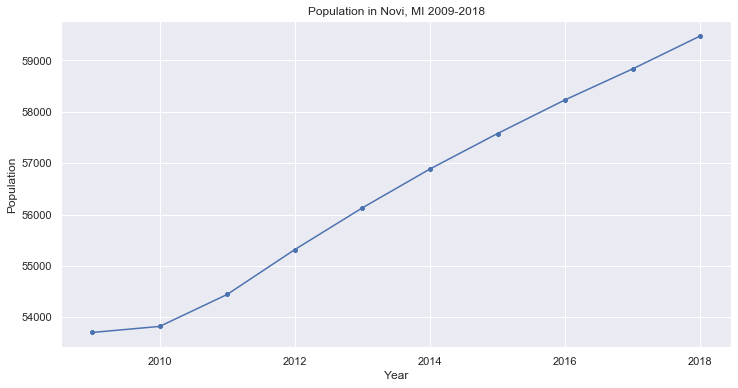

In [17]:
fig1, ax1 = plt.subplots(figsize=(12,6))
sns.scatterplot(x='Year',y='Population',data=df_pop)
sns.lineplot(x='Year',y='Population',data=df_pop)
ax1.set_xlabel('Year')
ax1.set_title('Population in Novi, MI 2009-2018')

## Population Change:

In [6]:
pop_chg = []
for i in range(len(df_pop['Population'])-1):
    pop_chg.append((df_pop['Population'][i+1]-df_pop['Population'][i])/
                   df_pop['Population'][i]*100)
year = df_pop.loc[1:,'Year']

Text(0.5, 1.0, 'Population Change in Novi, MI 2009-2018')

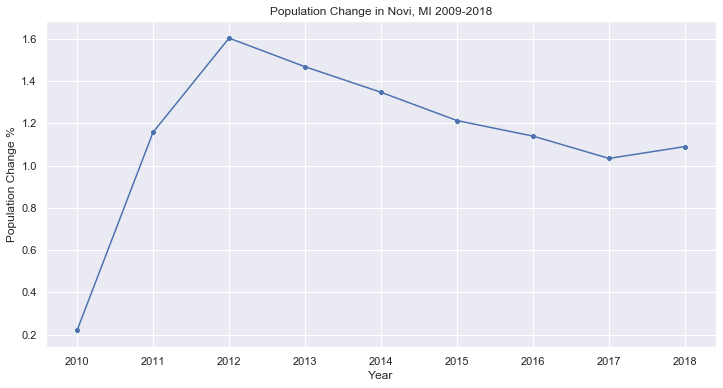

In [7]:
fig2, ax2 = plt.subplots(figsize=(12,6))
sns.scatterplot(x=year,y=pop_chg)
sns.lineplot(x=year,y=pop_chg)
ax2.set_xlabel('Year')
ax2.set_ylabel('Population Change %')
ax2.set_title('Population Change in Novi, MI 2009-2018')

## Crime Incident

#### To get html crime data: https://api.opendatanetwork.com/data/v1/values?app_token=cQovpGcdUT1CSzgYk0KPYdAI0&describe=true&format=google&variable=crime.fbi_ucr.count&entity_id=1600000US2659440&year=2016

In [25]:
crime_html = requests.get('https://api.opendatanetwork.com/data/v1/values?app_token=cQovpGcdUT1CSzgYk0KPYdAI0&describe=true&format=google&variable=crime.fbi_ucr.count&entity_id=1600000US2659440&year=2016').text
soup_crime = BeautifulSoup(crime_html,'lxml')

str_crime = soup_crime.p.text
#str_crime

**Use json2list to convert str into list**

In [27]:
crime_name, count = json2list(str_crime)
del crime_name[1]
del count[1]
crime_name

df_crime = pd.DataFrame(crime_name,columns=['Crime'])
df_crime['Count'] = count

df_crime

,Crime,Count
0,Aggravated assault,24
1,Arson,0
2,Burglary,56
3,Larceny,586
4,Motor vehicle theft,19
5,Murder and nonnegligent manslaughter,0
6,Property crime,661
7,Rape (revised definition),6
8,Robbery,2
9,Violent crime,32


Text(0.5, 1.0, 'Crime Incident Count in Novi, MI 2009-2018')

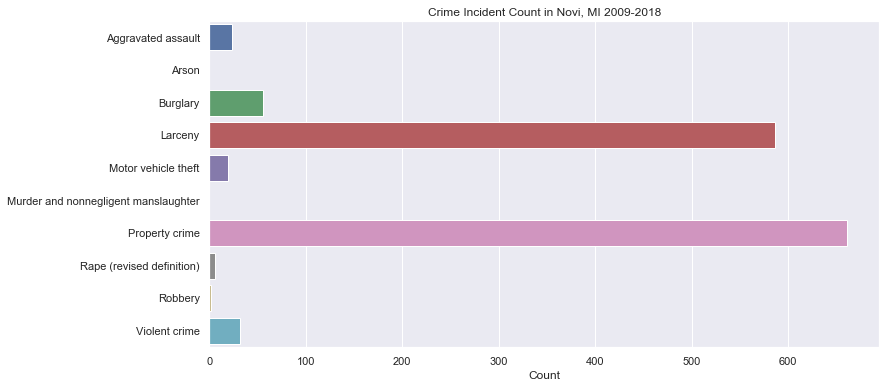

In [30]:
fig3, ax3 = plt.subplots(figsize=(12,6))
sns.barplot(x='Count',y='Crime',data=df_crime)

ax3.set_xlabel('Count')
ax3.set_ylabel('')
ax3.set_title('Crime Incident Count in Novi, MI 2009-2018')